# Ordinal Regresyon

Ordinal regresyon, bağımlı değişkenin kategorik ama sıralı olduğu (örneğin “düşük”, “orta”, “yüksek” gibi bir derecelendirme) durumlarda kullanılan bir istatistiksel modeldir. Bu tür verilerde, sıradan lojistik regresyon modellerinin kullanılmaması gerekir, çünkü kategoriler arasında yalnızca “ayrı” sınıflar yoktur, kategoriler hiyerarşik bir sıralamaya sahiptir. Bu nedenle klasik sınıflandırma yöntemleri sıralama bilgisini tam olarak değerlendiremez. Ordinal regresyon ise bağımlı değişkenin sırasal yapısını istatistiksel modele yansıtır.

Hangi Durumlarda Kullanılır?

* Müşteri memnuniyet dereceleri: “Çok memnun değil”, “Memnun”, “Çok memnun” gibi sıralı cevaplar <br>
* Hastalık şiddeti: “Hafif”, “Orta”, “Şiddetli” şeklinde belirtilen klinik derecelendirmeler<br>
* Eğitim seviyesi, gelir dilimi, risk skorları gibi doğal bir sıralamaya sahip kategorik değişkenlerin modellendiği durumlar<br>

pip install mord

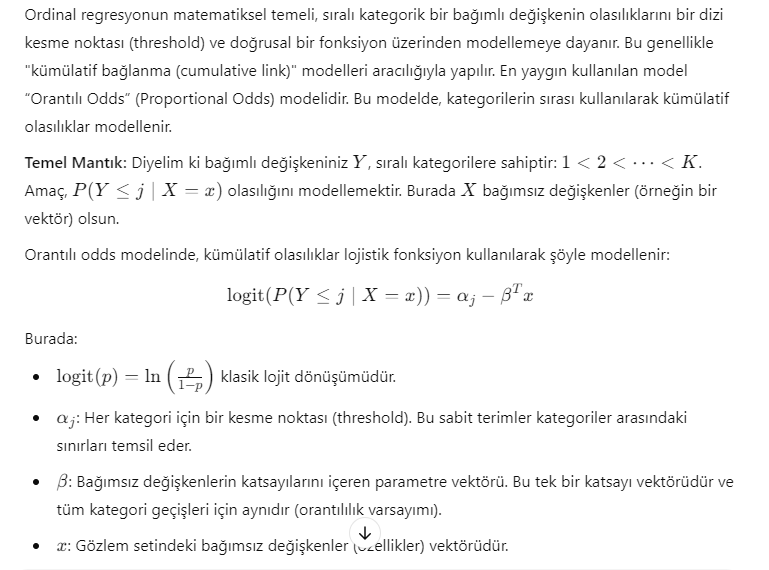
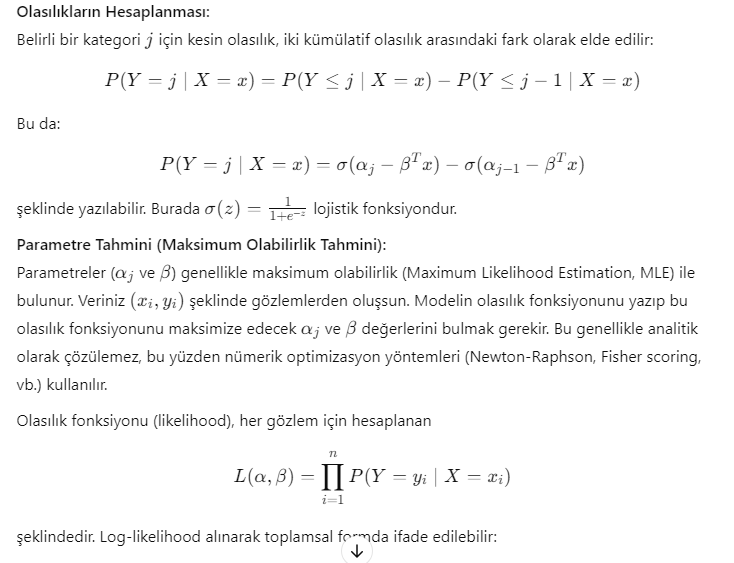
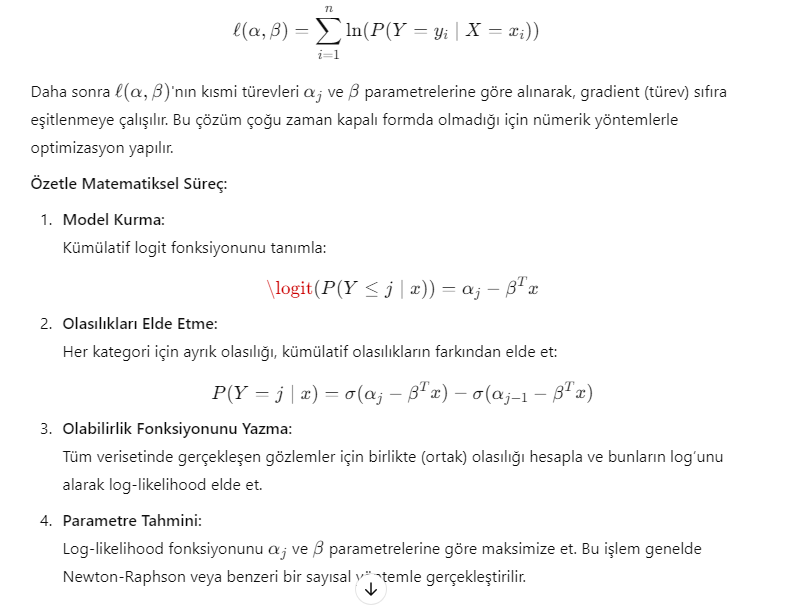
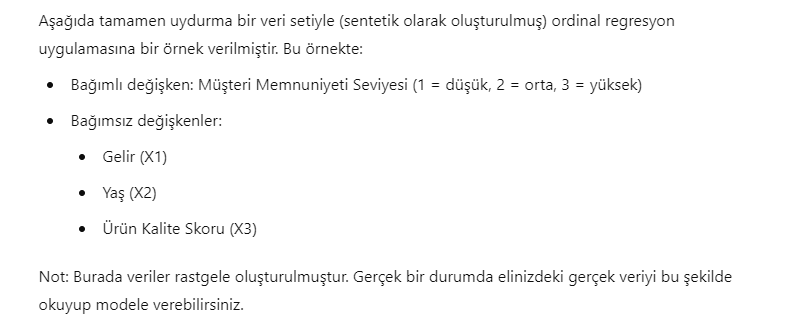

In [2]:
import numpy as np
import pandas as pd
from mord import LogisticIT
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

np.random.seed(42)
n = 200

X1 = np.random.normal(5000, 1000, n)
X2 = np.random.normal(35, 10, n)
X3 = np.random.normal(70, 5, n)

linear_part = 0.001*X1 + 0.03*X2 + 0.05*X3 - 8
thresholds = [-1, 2]  # Yeni eşik değerleri

Y = np.where(linear_part <= thresholds[0], 1,
    np.where(linear_part <= thresholds[1], 2, 3))

df = pd.DataFrame({
    'Gelir': X1,
    'Yaş': X2,
    'Kalite': X3,
    'Memnuniyet': Y
})

print("Kategori Dağılımı (Tüm Veri):")
print(df['Memnuniyet'].value_counts())

X = df[['Gelir', 'Yaş', 'Kalite']]
y = df['Memnuniyet']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nEğitim Verisi Kategori Dağılımı:")
print(y_train.value_counts())

model = LogisticIT()
model.fit(X_train, y_train)  # Eğer burada hala hata alıyorsanız, dağılımı tekrar ayarlayın.

y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))


Kategori Dağılımı (Tüm Veri):
Memnuniyet
2    145
3     55
Name: count, dtype: int64

Eğitim Verisi Kategori Dağılımı:
Memnuniyet
2    120
3     40
Name: count, dtype: int64

Confusion Matrix:
[[25  0]
 [ 1 14]]

Classification Report:
              precision    recall  f1-score   support

           2      0.962     1.000     0.980        25
           3      1.000     0.933     0.966        15

    accuracy                          0.975        40
   macro avg      0.981     0.967     0.973        40
weighted avg      0.976     0.975     0.975        40



In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# 1. Örnek veri setini oluştur
data = pd.DataFrame({
    'X': [2.0, 2.5, 3.0, 3.2, 3.8],
    'Y': ['Düşük', 'Düşük', 'Orta', 'Orta', 'Yüksek']
})

# Bağımlı değişkeni kategorik, sıralı hale getir
# Kategori sırası: Düşük < Orta < Yüksek
data['Y_cat'] = pd.Categorical(data['Y'], categories=['Düşük','Orta','Yüksek'], ordered=True)

# 2. Modeli tanımla
model = OrderedModel(data['Y_cat'], 
                     data[['X']], 
                     distr='logit')  # logit link fonksiyonu

# 3. Modeli fit et (Maksimum olabilirlik tahmini)
res = model.fit(method='bfgs', disp=False)

# Sonuçları yazdır
print(res.summary())

# 4. Tahminleri yap
# Belirli bir X değeri için kategorilerin olasılıklarını hesaplamak
test_X = pd.DataFrame({'X': [2.5, 3.1, 3.7]})
pred = res.predict(exog=test_X)
print(pred)  # Bu size Y=1(düşük), Y=2(orta), Y=3(yüksek) için olasılıkları verecektir.


                             OrderedModel Results                             
Dep. Variable:                  Y_cat   Log-Likelihood:            -8.2422e-07
Model:                   OrderedModel   AIC:                             6.000
Method:            Maximum Likelihood   BIC:                             4.828
Date:                Tue, 17 Dec 2024                                         
Time:                        13:36:01                                         
No. Observations:                   5                                         
Df Residuals:                       2                                         
Df Model:                           1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
X             125.0963   2.05e+04      0.006      0.995      -4e+04    4.02e+04
Düşük/Orta    360.6673   6.16e+04      0.006     